In [46]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [47]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [57]:
a1, b1 = env.chi2(env.T1.P, -env.T1.dT, params_name={'a': 'a1', 'b': 'mu1'}, mode='zero')
a2, b2 = env.chi2(env.T2.P, -env.T2.dT, params_name={'a': 'a2', 'b': 'mu2'}, mode='zero')
a3, b3 = env.chi2(env.T3.P, -env.T3.dT, params_name={'a': 'a3', 'b': 'mu3'}, mode='zero')

Using reversed axis
Using reversed axis
Using reversed axis


D:\mipt_edu\2sem\labs\2.1.6\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


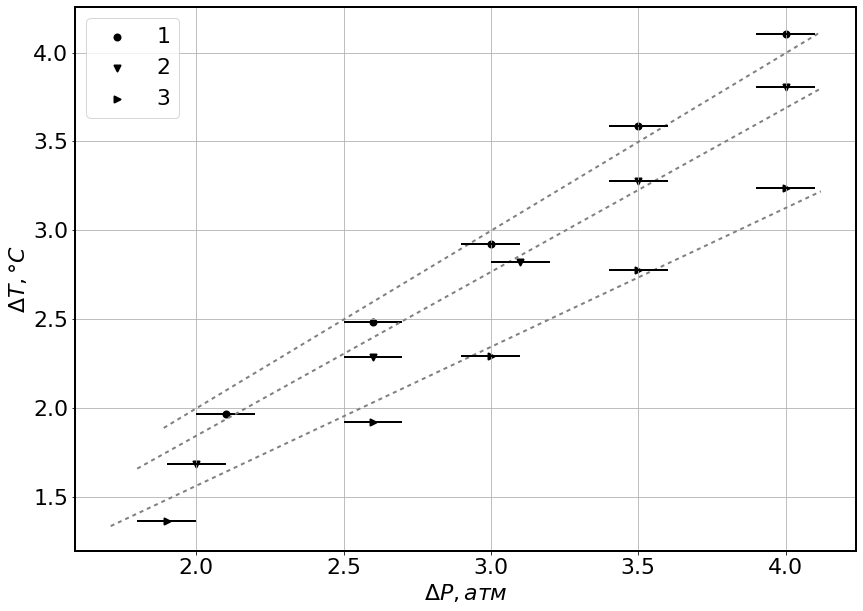

In [59]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

P, dT = env.T1.P.detach().numpy(), -env.T1.dT.detach().numpy()
ax.scatter(P, dT, linewidth=2, c='black', marker=markers[0], label='1')

X = np.array([min(P)*0.9, max(P)*1.03])
Y = a1.item() + b1.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])

ax.errorbar(P, dT, xerr = env.get_error(env.T1.P), fmt='none', linewidth=2, c='black')


P, dT = env.T2.P.detach().numpy(), -env.T2.dT.detach().numpy()
ax.scatter(P, dT, linewidth=2, c='black', marker=markers[1], label='2')

X = np.array([min(P)*0.9, max(P)*1.03])
Y = a2.item() + b2.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])

ax.errorbar(P, dT, xerr = env.get_error(env.T2.P), fmt='none', linewidth=2, c='black')


P, dT = env.T3.P.detach().numpy(), -env.T3.dT.detach().numpy()
ax.scatter(P, dT, linewidth=2, c='black', marker=markers[2], label='3')

X = np.array([min(P)*0.9, max(P)*1.03])
Y = a3.item() + b3.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])

ax.errorbar(P, dT, xerr = env.get_error(env.T3.P), fmt='none', linewidth=2, c='black')
ax.legend()


ax.set_ylabel(r"$\Delta T, °C$")
ax.set_xlabel(r"$\Delta P, атм$")
fig.savefig(r'../images/PdT.eps', format='eps')

In [60]:
env.show(b1)

('9.99', '0.17', -1)

In [61]:
env.show(b2)

('9.22', '0.26', -1)

In [62]:
env.show(b3)

('7.81', '0.25', -1)

In [76]:
fT = 1/(env.T.T)
bs = [b1/100000, b2/100000, b3/100000]

a_, b_ = env.chi2(fT, bs, params_name={'a': 'a_', 'b': 'b_'})

D:\mipt_edu\2sem\labs\2.1.6\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


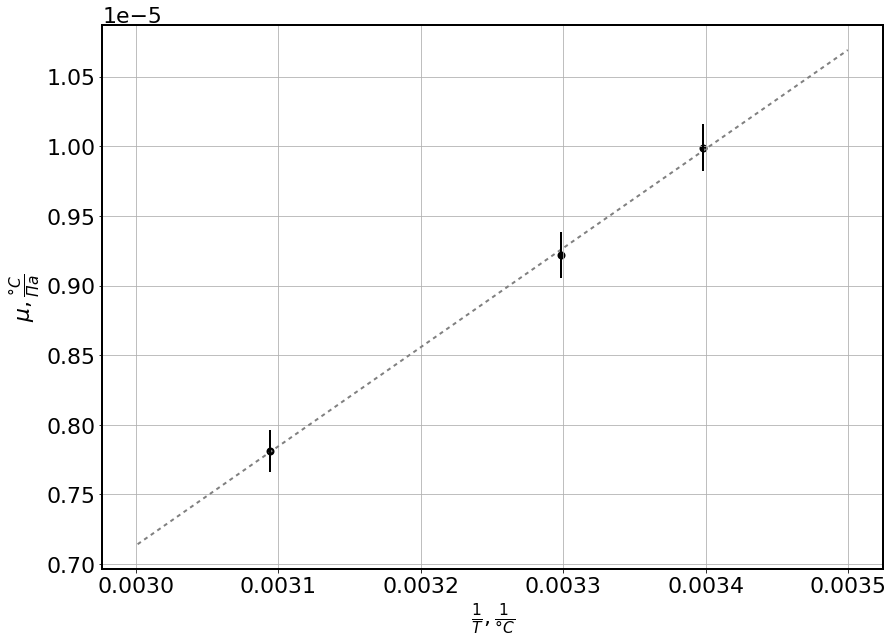

In [78]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

fT_, bs_ = fT.detach().numpy(), [b1.item()/100000, b2.item()/100000, b3.item()/100000]

ax.scatter(fT_, bs_, linewidth=2, c='black')

X = np.array([min(fT_)*0.97, max(fT_)*1.03])
Y = a_.item() + b_.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])

ax.errorbar(fT_, bs_, xerr = env.get_error(fT), yerr = [env.get_error(b1/100000), env.get_error(b2/100000), env.get_error(b3/100000)], fmt='none', linewidth=2, c='black')

ax.set_xlabel(r"$\frac{1}{T}, \frac{1}{°C}$")
ax.set_ylabel(r"$\mu, \frac{°C}{Па}$")
fig.savefig(r'../images/.eps', format='eps')

In [82]:
a = b_*29.14*8.31/2
b = -29.14*a_
T_inv = 2*a / (8.31 * b)

In [83]:
env.show(a, name='a')

('8.62', '0.24', -1)

In [84]:
env.show(b, name='b')

('4.14', '0.28', -4)

In [85]:
env.show(T_inv, name='T_inv')

('5.01', '0.36', 2)

In [86]:
2*0.3658 / (8.31 * 42.9 * 10**(-6))

2052.1796695081894

In [ ]:
0,3658 42,9 * 10^(-6)